<h1>Impacto de la pandemia del COVID-19 en el empleo de las mujeres</h1>

<p><b>Objetivo:</b> Determinar qué ocupaciones fueron las más afectadas, es decir reducieron su número con respecto al 2019</p>
<p><b>Metodologia:</b> Se determinó un porcentaje de incremento o decrementento del tercer trimestre del 2020 con respecto al primer trimestre del 2019 en las ocupaciones reportadas en la base de datos  <a href="https://api.datamexico.org/ui/?cube=wellness_credits&debug=false&distinct=true&drilldowns%5B%5D&measures%5B0%5D=Credits&nonempty=true&parents=false&sparse=false%2F">Data Mexico API explorer</a>. Posteriormente se visualizaron las 10 más afectadas en hombres y mujeres y las 10 menos afectadas en hombres y mujeres.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Occupation-Sex-Age Range-Quarter.csv") 

In [3]:
data

,Occupation ID,Occupation,Sex ID,Sex,Age Range ID,Age Range,Quarter ID,Quarter,Number of Records
0,1111,Altas Autoridades Gubernamentales y Jurisdicci...,1,Hombre,2,25 to 34 years,20191,2019-Q1,1
1,1111,Altas Autoridades Gubernamentales y Jurisdicci...,1,Hombre,2,25 to 34 years,20193,2019-Q3,1
2,1111,Altas Autoridades Gubernamentales y Jurisdicci...,1,Hombre,3,35 to 44 years,20194,2019-Q4,1
3,1111,Altas Autoridades Gubernamentales y Jurisdicci...,1,Hombre,3,35 to 44 years,20201,2020-Q1,1
4,1111,Altas Autoridades Gubernamentales y Jurisdicci...,1,Hombre,3,35 to 44 years,20204,2020-Q4,1
...,...,...,...,...,...,...,...,...,...
20770,9999,Ocupaciones no Especificadas,2,Mujer,4,45 to 54 years,20193,2019-Q3,6
20771,9999,Ocupaciones no Especificadas,2,Mujer,4,45 to 54 years,20194,2019-Q4,4
20772,9999,Ocupaciones no Especificadas,2,Mujer,4,45 to 54 years,20201,2020-Q1,7
20773,9999,Ocupaciones no Especificadas,2,Mujer,4,45 to 54 years,20203,2020-Q3,4


In [4]:
#Eliminación de ocupaciones no Especificadas

In [5]:
data_filtered = data[data['Occupation ID'] != 9999]

In [6]:
## Para filtrar ocupacion, sexo, quarter ID 
## ['Occupation', 'Sex', 'Quarter ID']
## Se eliminaron las columnas ['Sex ID', 'Occupation ID', 'Age Range ID', 'Age Range', 'Quarter']

In [7]:
data_filtered = data_filtered.drop(columns=['Sex ID', 'Occupation ID', 'Age Range ID', 'Age Range', 'Quarter'])

In [8]:
## Se dividieron los datos en mujeres y en hombres 

In [9]:
data_mujer = data_filtered[data_filtered['Sex'] == 'Mujer']

In [10]:
data_hombre = data_filtered[data_filtered['Sex'] == 'Hombre']

In [11]:
## Se eliminó la columna "sex" de ambos datos

In [12]:
data_mujer = data_mujer.drop(columns=['Sex'])
data_hombre = data_hombre.drop(columns=['Sex'])

In [13]:
## Se agrupó por ocupación y Quarter ID

In [14]:
data_mujer = data_mujer.groupby(['Occupation','Quarter ID']).sum()

In [15]:
data_hombre = data_hombre.groupby(['Occupation','Quarter ID']).sum()

In [16]:
## Se cambió el orden del df según la fecha para facilitar las funciones siguientes

In [17]:
data_mujer = data_mujer.unstack()

In [18]:
data_hombre = data_hombre.unstack()

In [19]:
## Los datos con NaN, fueron puestos por python para rellenar la tabla, sin embargo indican que no hubieron datos
## en esa fecha

In [20]:
## Calculo del porcentaje de decrecemento / incremento

In [21]:
def porce_data(data):
    for j in range(0,448):
        for i in range(1,7):
            if data.iloc[j][0] == 0:
                data.iloc[j][i] = data.iloc[j][i] * 100
            else:
                red = ((data.iloc[j][i] - data.iloc[j][0])/data.iloc[j][0])*100
                data.iloc[j][i] = red
    return data

In [22]:
data_mujer_porc = porce_data(data_mujer)

In [23]:
data_hombre_porc = porce_data(data_hombre)

In [24]:
data_mujer_porc 

Number of Records  \
Quarter ID                                                     20191   
Occupation                                                             
Abogados                                                       495.0   
Actores                                                          6.0   
Administradores de Bases de Datos y Redes de Co...              10.0   
Administradores y Especialistas en Recursos Hum...             127.0   
Agentes Aduanales y Fronterizos                                  9.0   
...                                                              ...   
Vigilantes y Guardias en Establecimientos                      279.0   
Vigilantes y Porteros en Casas Particulares                      8.0   
Yeseros, Escayolistas y otros Recubridores de T...               NaN   
Zapateros Artesanales                                           62.0   
Árbitros y Jueces Deportivos                                     NaN   

                                                                          \
Quarter ID                                              20192      20193   
Occupation                                                                 
Abogados                                             0.202020   2.828283   
Actores                                            -50.000000 -33.333333   
Administradores de Bases de Datos y Redes de Co... -20.000000   0.000000   
Administradores y Especialistas en Recursos Hum...   0.000000 -12.598425   
Agentes Aduanales y Fronterizos                    -33.333333 -55.555556   
...                                                       ...        ...   
Vigilantes y Guardias en Establecimientos            5.734767   7.526882   
Vigilantes y Porteros en Casas Particulares        -62.500000 -62.500000   
Yeseros, Escayolistas y otros Recubridores de T...        NaN        NaN   
Zapateros Artesanales                              -11.290323  19.354839   
Árbitros y Jueces Deportivos                              NaN        NaN   

                                                                          \
Quarter ID                                              20194      20201   
Occupation                                                                 
Abogados                                             7.676768   5.454545   
Actores                                            -66.666667 -33.333333   
Administradores de Bases de Datos y Redes de Co...  50.000000 -10.000000   
Administradores y Especialistas en Recursos Hum...  -8.661417  22.834646   
Agentes Aduanales y Fronterizos                    -11.111111  55.555556   
...                                                       ...        ...   
Vigilantes y Guardias en Establecimientos           -2.508961  11.111111   
Vigilantes y Porteros en Casas Particulares        -75.000000        NaN   
Yeseros, Escayolistas y otros Recubridores de T...        NaN        NaN   
Zapateros Artesanales                               -8.064516 -25.806452   
Árbitros y Jueces Deportivos                              NaN        NaN   

                                                                          
Quarter ID                                              20203      20204  
Occupation                                                                
Abogados                                           -28.686869 -12.929293  
Actores                                                   NaN -50.000000  
Administradores de Bases de Datos y Redes de Co... -10.000000 -10.000000  
Administradores y Especialistas en Recursos Hum... -21.259843  11.811024  
Agentes Aduanales y Fronterizos                    -55.555556 -44.444444  
...                                                       ...        ...  
Vigilantes y Guardias en Establecimientos          -24.014337   1.075269  
Vigilantes y Porteros en Casas Particulares        -75.000000 -87.500000  
Yeseros, Escayolistas y otros Recubridores de T...        NaN        NaN  
Zapateros Ar

In [25]:
data_hombre_porc

Number of Records  \
Quarter ID                                                     20191   
Occupation                                                             
Abogados                                                       733.0   
Actores                                                          4.0   
Administradores de Bases de Datos y Redes de Co...              32.0   
Administradores y Especialistas en Recursos Hum...             114.0   
Agentes Aduanales y Fronterizos                                 11.0   
...                                                              ...   
Vigilantes y Guardias en Establecimientos                     1682.0   
Vigilantes y Porteros en Casas Particulares                     70.0   
Yeseros, Escayolistas y otros Recubridores de T...             160.0   
Zapateros Artesanales                                          220.0   
Árbitros y Jueces Deportivos                                    41.0   

                                                                              \
Quarter ID                                                20192        20193   
Occupation                                                                     
Abogados                                               2.864939    -0.545703   
Actores                                              -25.000000     0.000000   
Administradores de Bases de Datos y Redes de Co...     0.000000    12.500000   
Administradores y Especialistas en Recursos Hum...    -8.771930     0.877193   
Agentes Aduanales y Fronterizos                      100.000000     9.090909   
...                                                         ...          ...   
Vigilantes y Guardias en Establecimientos           1730.000000  1753.000000   
Vigilantes y Porteros en Casas Particulares           62.000000    77.000000   
Yeseros, Escayolistas y otros Recubridores de T...   116.000000   135.000000   
Zapateros Artesanales                                234.000000   221.000000   
Árbitros y Jueces Deportivos                          37.000000    25.000000   

                                                                              \
Quarter ID                                                20194        20201   
Occupation                                                                     
Abogados                                               0.818554     1.909959   
Actores                                              -25.000000   -25.000000   
Administradores de Bases de Datos y Redes de Co...    12.500000    25.000000   
Administradores y Especialistas en Recursos Hum...     5.263158    -3.508772   
Agentes Aduanales y Fronterizos                       36.363636   109.090909   
...                                                         ...          ...   
Vigilantes y Guardias en Establecimientos           1772.000000  1839.000000   
Vigilantes y Porteros en Casas Particulares           83.000000    76.000000   
Yeseros, Escayolistas y otros Recubridores de T...   130.000000   120.000000   
Zapateros Artesanales                                220.000000   212.000000   
Árbitros y Jueces Deportivos                          16.000000    15.000000   

                                                                              
Quarter ID                                                20203        20204  
Occupation                                                                    
Abogados                                             -32.605730   -19.236016  
Actores                                              -25.000000    50.000000  
Administradores de Bases de Datos y Redes de Co...    37.500000    15.625000  
Administradores y Especialistas en Recursos Hum...   -14.912281    -1.754386  
Agentes Aduanales y Fronterizos                       18.181818    27.272727  
...                                                         ...          ...  
Vigilantes y Guardias en Establecimientos           1313.000000  1475.000000  
Vigilantes

In [26]:
#### Definir las ocupaciones con mayor decremento, con la función min

In [61]:
### en el cuarto trimestre del 2020

In [28]:
min_mujer = data_mujer_porc.iloc[:,6].nsmallest(10)

In [29]:
min_mujer

Occupation
Ayudantes de Conductores de Transporte Terrestre con Motor      -88.888889
Vigilantes y Porteros en Casas Particulares                     -87.500000
Lavadores de Vehículos en Vía Pública                           -85.714286
Trabajadores que Combinan Actividades Agrícolas con Ganaderas   -83.333333
Bailarines y Coreógrafos                                        -77.777778
Cuidadores y Acomodadores de Autos en Estacionamientos          -75.000000
Recolectores de Leña y Acarreadores de Agua                     -75.000000
Trabajadores en el Cultivo de Flores                            -75.000000
Directores y Gerentes en Informática                            -66.666667
Diseñadores Industriales                                        -66.666667
Name: (Number of Records, 20204), dtype: float64

In [30]:
min_hombre = data_hombre_porc.iloc[:,6].nsmallest(10)

In [31]:
min_hombre

Occupation
Trabajadores en la Preparación de Fibras e Hilados                                   -90.909091
Escenógrafos                                                                         -83.333333
Caucheros, Chicleros, Resineros y Similares                                          -76.923077
Legisladores                                                                         -75.000000
Taquígrafos, Mecanógrafos y Similares                                                -75.000000
Trabajadores en la Apicultura                                                        -69.230769
Ingenieros Biomédicos                                                                -66.666667
Optometristas                                                                        -66.666667
Otros Conductores de Transporte Terrestre con Motor, no Clasificados Anteriormente   -66.666667
Trabajadores de Apoyo que Realizan Actividades Agrícolas y Ganaderas                 -64.601770
Name: (Number of Records, 202

In [32]:
type(min_hombre)

pandas.core.series.Series

In [33]:
trabajos_hombre_min = min_hombre.tolist()

In [34]:
label_hombre_min=min_hombre.index.tolist()

In [35]:
trabajos_mujer_min = min_mujer.tolist()

In [36]:
label_mujer_min = min_mujer.index.tolist()

In [37]:
## Ocupaciones con mayor crecimiento

In [38]:
max_mujer = data_mujer_porc.iloc[:,6].nlargest(10)

In [39]:
max_mujer

Occupation
Ingenieros en Minas, Metalurgia y Petróleo                                                                             400.000000
Otros Directores, Funcionarios, Gerentes, Coordinadores y Jefes de Área, no Clasificados Anteriormente                 400.000000
Ingenieros en Topografía, Hidrología, Geología y Geodesia                                                              350.000000
Ingenieros Químicos                                                                                                    320.000000
Otros Operadores de Maquinaria Industrial, Ensambladores y Conductores de Transporte, no Clasificados Anteriormente    300.000000
Supervisores de Técnicos Eléctricos, en Electrónica y de Equipos en Telecomunicaciones y Electromecánicos              300.000000
Inspectores en Seguridad Social, de Precios y otros Inspectores Públicos                                               266.666667
Auxiliares y Técnicos Mineros, Metalúrgicos y Petroleros                       

In [40]:
trabajos_mujer_max = max_mujer.tolist()
label_mujer_max = max_mujer.index.tolist()

In [41]:
max_hombre = data_hombre_porc.iloc[:,6].nlargest(10)
max_hombre

Occupation
Vigilantes y Guardias en Establecimientos                                                                          1475.0
Trabajadores de la Fuerza Armada Aérea                                                                              600.0
Vendedores Ambulantes de Artículos Diversos (Excluyendo los de Venta de Alimentos)                                  525.0
Técnicos en la Instalación y Reparación de Redes, Equipos y en Sistemas Computacionales                             438.0
Especialistas en Seguridad e Higiene y Salud Pública                                                                400.0
Pilotos de Aviación                                                                                                 400.0
Cargadores por Propina                                                                                              250.0
Técnicos en la Instalación, Reparación y Mantenimiento de Equipos de Refrigeración, Climas y Aire Acondicionado     231.0
Zapateros Art

In [1]:
## Formato
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = "serif"

NameError: name 'plt' is not defined

In [53]:
trabajos_hombre_max = max_hombre.tolist()
label_hombre_max = max_hombre.index.tolist()

In [54]:
## En hombres

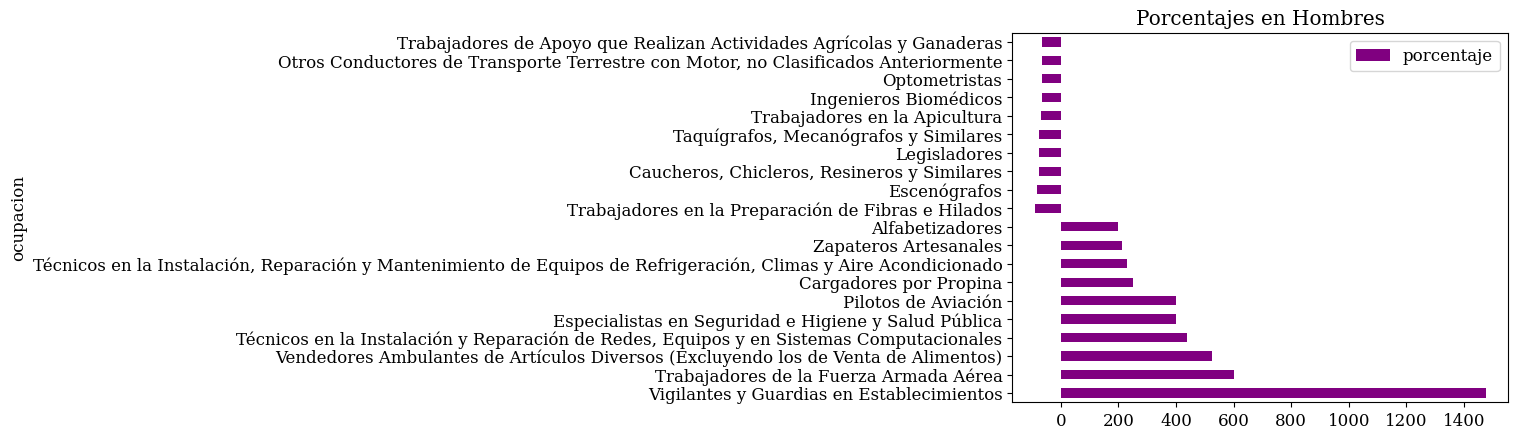

In [58]:
import pandas as pd
import matplotlib.pyplot as plot

growthData = {"ocupacion": label_hombre_max + label_hombre_min,

              "porcentaje":trabajos_hombre_max + trabajos_hombre_min};

dataFrame  = pd.DataFrame(data = growthData);

dataFrame.plot.barh(x='ocupacion', y='porcentaje', title="Porcentajes en Hombres 202", color= 'purple');

plt.savefig('figura1.png', dpi=300)
plot.show(block=True);

In [78]:
## En mujeres

In [100]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [96]:
## Formatos

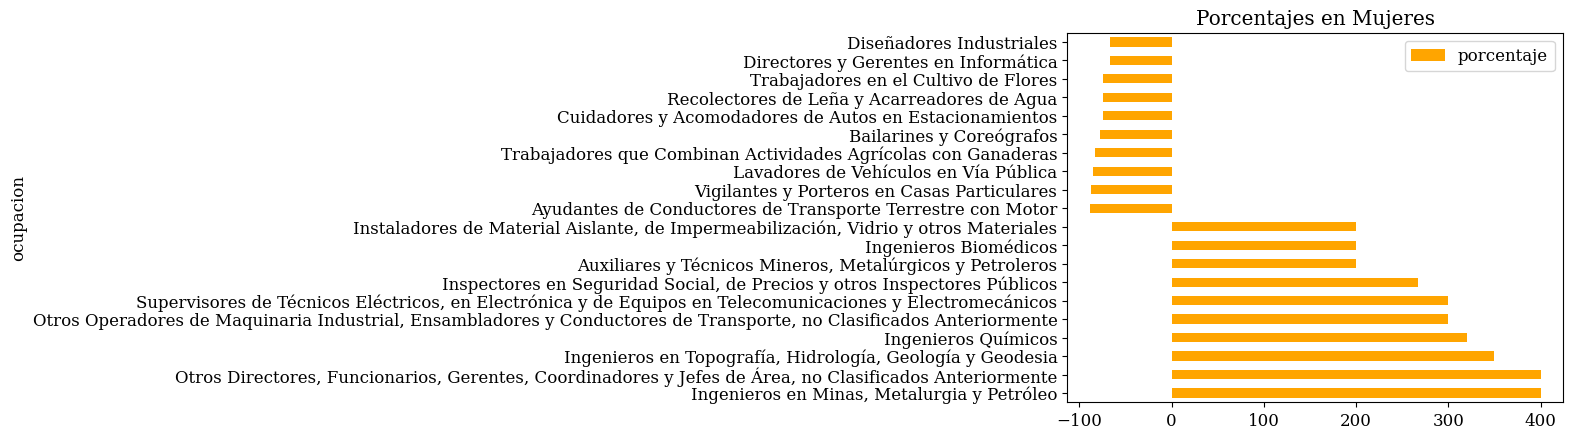

In [60]:
import pandas as pd
import matplotlib.pyplot as plot

growthData = {"ocupacion": label_mujer_max + label_mujer_min,

              "porcentaje":trabajos_mujer_max + trabajos_mujer_min};

dataFrame  = pd.DataFrame(data = growthData);

dataFrame.plot.barh(x='ocupacion', y='porcentaje', title="Porcentajes en Mujeres", color='orange');

plt.savefig('figura2.png', dpi=300)
plot.show(block=True);